# KRK Fault SP vs DP

## Run C++ examples

In [1]:
%%bash
TOP=${TOP:-$(git rev-parse --show-toplevel)}
PATH=${TOP}/build/Examples/Cxx

#1ms simulation
DURATION=20
STARTTIMEFAULT=10
ENDTIMEFAULT=10.2
TIMESTEP=1e-3
TIMESTEPSTR=$(printf "%1.6f\n" ${TIMESTEP})

SP_SynGenTrStab_KRK_TwoAreaTrafo_SteadyState

[19:49:33.167394 PiLine56 warning] Zero value for Conductance, setting default value of G=1e-06 [S]
[19:49:33.167641 PiLine67 warning] Zero value for Conductance, setting default value of G=1e-06 [S]
[19:49:33.167853 Piline78_1 warning] Zero value for Conductance, setting default value of G=1e-06 [S]
[19:49:33.168070 Piline78_2 warning] Zero value for Conductance, setting default value of G=1e-06 [S]
[19:49:33.168303 Piline89_1 warning] Zero value for Conductance, setting default value of G=1e-06 [S]
[19:49:33.168546 Piline89_2 warning] Zero value for Conductance, setting default value of G=1e-06 [S]
[19:49:33.168781 PiLine910 warning] Zero value for Conductance, setting default value of G=1e-06 [S]
[19:49:33.169026 PiLine1011 warning] Zero value for Conductance, setting default value of G=1e-06 [S]
[19:49:33.171784 SP_SynGenTrStab_KRK_TwoAreaTrafo_SteadyState_PF info] Initialize simulation: SP_SynGenTrStab_KRK_TwoAreaTrafo_SteadyState_PF
[19:49:33.177638 SP_SynGenTrStab_KRK_TwoAreaTra

In [2]:
import villas.dataprocessing.readtools as rt
from villas.dataprocessing.timeseries import TimeSeries as ts
import matplotlib.pyplot as plt
import re
import numpy as np
import math
import os
from datetime import date
import pandas as pd

%matplotlib widget

In [3]:
# Read results
# import villas.dataprocessing.readtools as rt
# from villas.dataprocessing.timeseries import TimeSeries as ts

V_nom = 230e3
V_nom_gen = 20e3

work_dir = 'logs/SP_SynGenTrStab_KRK_TwoAreaTrafo_SteadyState_PF/'
log_name = 'SP_SynGenTrStab_KRK_TwoAreaTrafo_SteadyState_PF'

print(work_dir + log_name + '.csv')

ts_pfsimpy = rt.read_timeseries_dpsim(work_dir + log_name + '.csv')

results=pd.DataFrame()
results = pd.DataFrame(columns=['Bus', 'Voltage Mag [V]', 'Voltage Ang [deg]'])
i = 0

primary_nodes = ['v_bus1','v_bus2','v_bus3','v_bus4']

for node,node_data in ts_pfsimpy.items():
    
    if node in primary_nodes:
        results.loc[i] = [node] + ["{0:.3f}".format(np.absolute(ts_pfsimpy[node].values[-1])/V_nom_gen)] + ["{0:.3f}".format(np.degrees(np.angle(ts_pfsimpy[node].values[-1])) - 6.8)]
    else:
        results.loc[i] = [node] + ["{0:.3f}".format(np.absolute(ts_pfsimpy[node].values[-1])/V_nom)] + ["{0:.3f}".format(np.degrees(np.angle(ts_pfsimpy[node].values[-1])) - 6.8)]
    i += 1

print(results)

logs/SP_SynGenTrStab_KRK_TwoAreaTrafo_SteadyState_PF/SP_SynGenTrStab_KRK_TwoAreaTrafo_SteadyState_PF.csv
column number: 11
results length: 2
real column names: []
complex column names: ['v_bus1', 'v_bus10', 'v_bus11', 'v_bus2', 'v_bus3', 'v_bus4', 'v_bus5', 'v_bus6', 'v_bus7', 'v_bus8', 'v_bus9']
        Bus Voltage Mag [V] Voltage Ang [deg]
0    v_bus1           1.030            20.017
1   v_bus10           0.986           -23.698
2   v_bus11           1.009           -13.422
3    v_bus2           1.010            10.269
4    v_bus3           1.030            -6.800
5    v_bus4           1.010           -16.968
6    v_bus5           1.007            13.558
7    v_bus6           0.981             3.500
8    v_bus7           0.965            -4.863
9    v_bus8           0.954           -18.602
10   v_bus9           0.976           -32.058


## Results 1ph SP

In [4]:
work_dir = 'logs/SP_SynGenTrStab_KRK_TwoAreaTrafo_SteadyState_SP/'
log_name = 'SP_SynGenTrStab_KRK_TwoAreaTrafo_SteadyState_SP'
print(work_dir + log_name + '.csv')
ts_sp1ph_TrStab_dl= rt.read_timeseries_dpsim(work_dir + log_name + '.csv')

logs/SP_SynGenTrStab_KRK_TwoAreaTrafo_SteadyState_SP/SP_SynGenTrStab_KRK_TwoAreaTrafo_SteadyState_SP.csv
column number: 68
results length: 30000
real column names: ['Ep_gen1', 'Ep_gen2', 'Ep_gen3', 'Ep_gen4', 'P_elec1', 'P_elec2', 'P_elec3', 'P_elec4', 'P_mech1', 'P_mech2', 'P_mech3', 'P_mech4', 'delta_gen1', 'delta_gen2', 'delta_gen3', 'delta_gen4', 'wr_gen1', 'wr_gen2', 'wr_gen3', 'wr_gen4', 'wref_gen2']
complex column names: ['i_gen1', 'i_gen2', 'i_gen3', 'i_gen4', 'i_line1011', 'i_line56', 'i_line67', 'i_line78_1', 'i_line78_2', 'i_line89_1', 'i_line89_2', 'i_line910', 'i_load7', 'i_load9', 'i_trafo15', 'i_trafo26', 'i_trafo311', 'i_trafo410', 'v1', 'v10', 'v11', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v_gen1', 'v_gen2', 'v_gen3', 'v_gen4', 'v_line1011', 'v_line56', 'v_line67', 'v_line78_1', 'v_line78_2', 'v_line89_1', 'v_line89_2', 'v_line910', 'v_load7', 'v_load9', 'v_trafo15', 'v_trafo26', 'v_trafo311', 'v_trafo410']


## Parameters

In [5]:
timestep=50e-6;
t_begin=0
t_end=20

begin_idx = int(t_begin/timestep)
end_idx= int(t_end/timestep)

## Generator terminal voltage

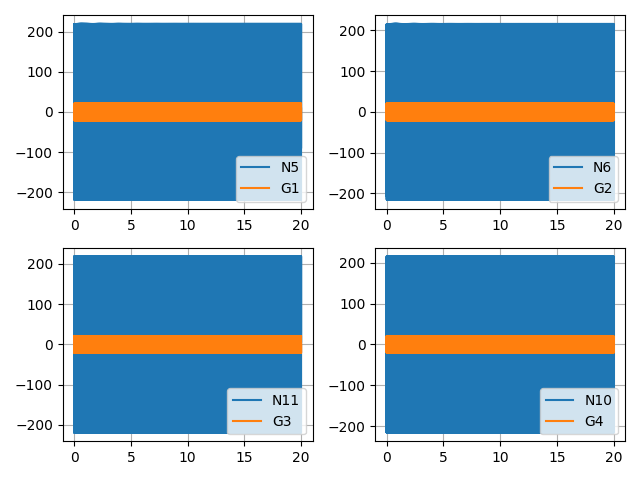

In [6]:
plt.figure()
# plt.title('SMIB generator terminal voltage')
plt.xlabel('time (s)')
plt.ylabel('voltage (kV)')

plt.subplot(2, 2, 1)
for name in ['v_trafo15']:
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_sp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='N5')
for name in ['v_gen1']:
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_sp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='G1')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()

plt.subplot(2, 2, 2)
for name in ['v_trafo26']:
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_sp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='N6')

for name in ['v_gen2']:
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_sp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='G2')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()

plt.subplot(2, 2, 3)
for name in ['v_trafo311']:
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_sp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='N11')

for name in ['v_gen3']:
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_sp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='G3')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()

plt.subplot(2, 2, 4)
for name in ['v_trafo410']:
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_sp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='N10')

for name in ['v_gen4']:
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_sp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='G4')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
    
# plt.xlim(9,11)
# plt.ylim(-300,300)
#     plt.plot(ts_dp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_dp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], linestyle='--', label='DP')
    
# plt.xlim(9.98,10.2)
# plt.ylim(-800,800)


## Generator terminal Current

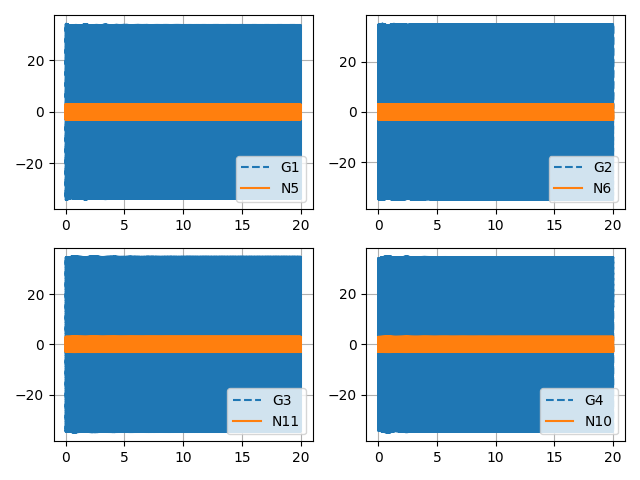

In [7]:
plt.figure()
# plt.title('SMIB generator terminal current')
plt.xlabel('time (s)')
plt.ylabel('current (kA)')

plt.subplot(2,2,1)
for name in ['i_gen1']:
#    plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  1e-3*ts_ref_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], color='black')
#    plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  1e-3*ts_ref_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='REF backshift', color='black', linestyle=':' )
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_sp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='G1', linestyle='--')
    
for name in ['i_trafo15']:    
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_sp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='N5')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()

plt.subplot(2,2,2)
for name in ['i_gen2']:
#    plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  1e-3*ts_ref_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], color='black')
#    plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  1e-3*ts_ref_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='REF backshift', color='black', linestyle=':' )
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_sp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='G2', linestyle='--')
    
for name in ['i_trafo26']:    
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_sp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='N6')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()

plt.subplot(2,2,3)
for name in ['i_gen3']:
#    plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  1e-3*ts_ref_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], color='black')
#    plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  1e-3*ts_ref_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='REF backshift', color='black', linestyle=':' )
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_sp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='G3', linestyle='--')
    
for name in ['i_trafo311']:    
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_sp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='N11')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()

plt.subplot(2,2,4)
for name in ['i_gen4']:
#    plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  1e-3*ts_ref_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], color='black')
#    plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  1e-3*ts_ref_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='REF backshift', color='black', linestyle=':' )
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_sp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='G4', linestyle='--')
    
for name in ['i_trafo410']:    
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_sp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='N10')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()


# plt.legend(loc='lower right')
# plt.xlim(9.98,10.2)
# plt.ylim(-250,250)


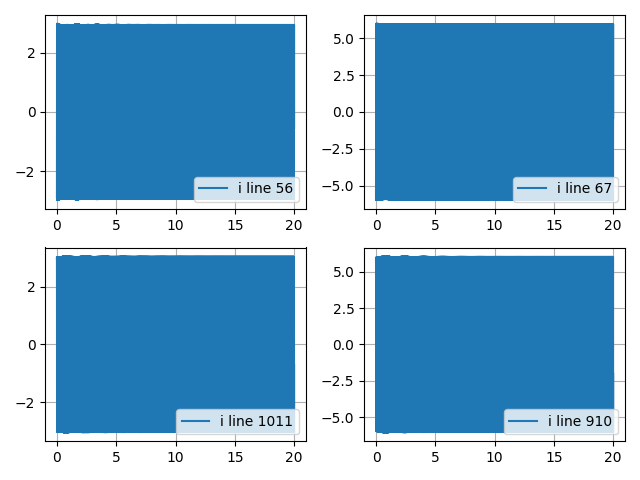

In [8]:
plt.figure()
# plt.title('SMIB generator terminal current')
plt.xlabel('time (s)')
plt.ylabel('current (kA)')

plt.subplot(2,2,1)
for name in ['i_line56']:
#    plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  1e-3*ts_ref_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], color='black')
#    plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  1e-3*ts_ref_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='REF backshift', color='black', linestyle=':' )
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_sp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='i line 56')
    #plt.plot(ts_dp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_dp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='DP', linestyle='--')
    
plt.legend(loc='lower right')
# plt.xlim(9.98,10.2)
# plt.ylim(-250,250)
plt.grid()
plt.tight_layout()

plt.subplot(2,2,2)
for name in ['i_line67']:
#    plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  1e-3*ts_ref_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], color='black')
#    plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  1e-3*ts_ref_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='REF backshift', color='black', linestyle=':' )
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_sp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='i line 67')
    #plt.plot(ts_dp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_dp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='DP', linestyle='--')
    
plt.legend(loc='lower right')
# plt.xlim(9.98,10.2)
# plt.ylim(-250,250)
plt.grid()
plt.tight_layout()

plt.subplot(2,2,3)
for name in ['i_line1011']:
#    plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  1e-3*ts_ref_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], color='black')
#    plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  1e-3*ts_ref_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='REF backshift', color='black', linestyle=':' )
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_sp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='i line 1011')
    #plt.plot(ts_dp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_dp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='DP', linestyle='--')
    
plt.legend(loc='lower right')
# plt.xlim(9.98,10.2)
# plt.ylim(-250,250)
plt.grid()
plt.tight_layout()

plt.subplot(2,2,4)
for name in ['i_line910']:
#    plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  1e-3*ts_ref_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], color='black')
#    plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  1e-3*ts_ref_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='REF backshift', color='black', linestyle=':' )
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_sp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='i line 910')
    #plt.plot(ts_dp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_dp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='DP', linestyle='--')
    
plt.legend(loc='lower right')
# plt.xlim(9.98,10.2)
# plt.ylim(-250,250)
plt.grid()
plt.tight_layout()

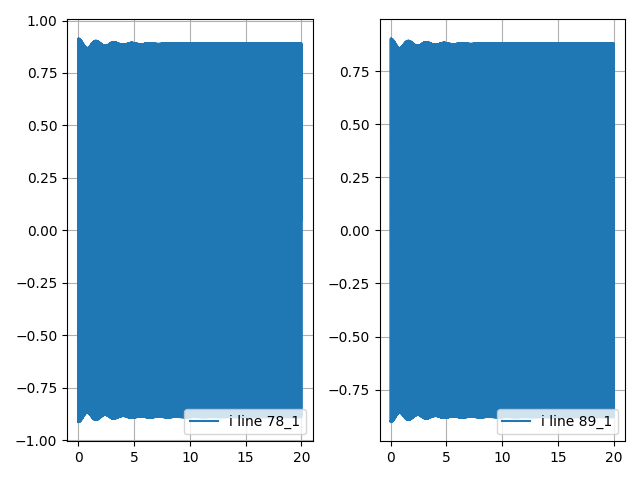

In [9]:
plt.figure()
plt.subplot(1,2,1)
for name in ['i_line78_1']:
#    plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  1e-3*ts_ref_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], color='black')
#    plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  1e-3*ts_ref_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='REF backshift', color='black', linestyle=':' )
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_sp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='i line 78_1')
    #plt.plot(ts_dp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_dp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='DP', linestyle='--')
    
plt.legend(loc='lower right')
# plt.xlim(9.98,10.2)
# plt.ylim(-250,250)
plt.grid()
plt.tight_layout()

plt.subplot(1,2,2)
for name in ['i_line89_1']:
#    plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  1e-3*ts_ref_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], color='black')
#    plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  1e-3*ts_ref_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='REF backshift', color='black', linestyle=':' )
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_sp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='i line 89_1')
    #plt.plot(ts_dp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_dp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='DP', linestyle='--')
    
plt.legend(loc='lower right')
# plt.xlim(9.98,10.2)
# plt.ylim(-250,250)
plt.grid()
plt.tight_layout()

## Generator electrical & mechanical energy

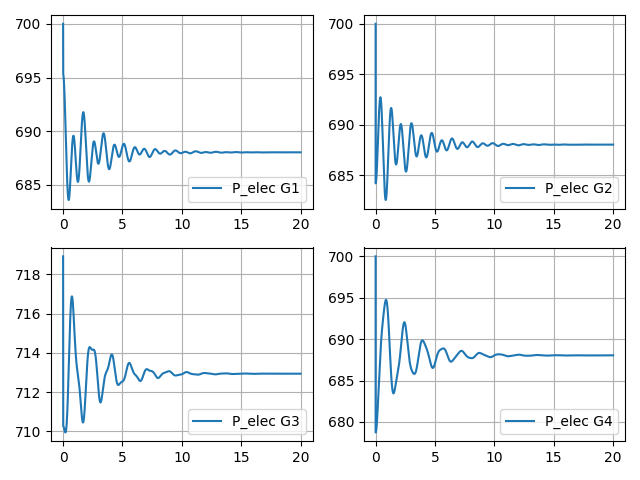

In [13]:
plt.figure()
# plt.title('SMIB generator power')
plt.xlabel('time (s)')
plt.ylabel('power (MW)')

# for name in ['P_elec1']:
#     plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  1e-6*ts_ref_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx], color='black')
#     plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  1e-6*ts_ref_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx], label='REF', color='black', linestyle=':' )
#     plt.plot(ts_dp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-6*ts_dp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx], label='DP', linestyle='--')
    
plt.subplot(2,2,1)
for name in ['P_elec1']:    
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-6*ts_sp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx], label='P_elec G1')

#     plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-6*ts_sp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx], label='SP')  
#     plt.plot(ts_dp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-6*ts_dp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx], linestyle='--', label='DP')
plt.legend(loc='lower right')
# plt.xlim(9,12)
# plt.ylim(650, 750)
plt.grid()
plt.tight_layout()

plt.subplot(2,2,2)
for name in ['P_elec2']:    
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-6*ts_sp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx], label='P_elec G2')

#     plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-6*ts_sp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx], label='SP')  
#     plt.plot(ts_dp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-6*ts_dp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx], linestyle='--', label='DP')
plt.legend(loc='lower right')
# plt.xlim(9,12)
# plt.ylim(650, 750)
plt.grid()
plt.tight_layout()

plt.subplot(2,2,3)
for name in ['P_elec3']:    
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-6*ts_sp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx], label='P_elec G3')

#     plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-6*ts_sp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx], label='SP')  
#     plt.plot(ts_dp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-6*ts_dp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx], linestyle='--', label='DP')
plt.legend(loc='lower right')
# plt.xlim(9,12)
# plt.ylim(670, 770)
plt.grid()
plt.tight_layout()

plt.subplot(2,2,4)
for name in ['P_elec4']:    
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-6*ts_sp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx], label='P_elec G4')

#     plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-6*ts_sp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx], label='SP')  
#     plt.plot(ts_dp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-6*ts_dp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx], linestyle='--', label='DP')
plt.legend(loc='lower right')
# plt.xlim(9,12)
# plt.ylim(650, 750)
plt.grid()
plt.tight_layout()


## Rotor angular speed $\omega_r$

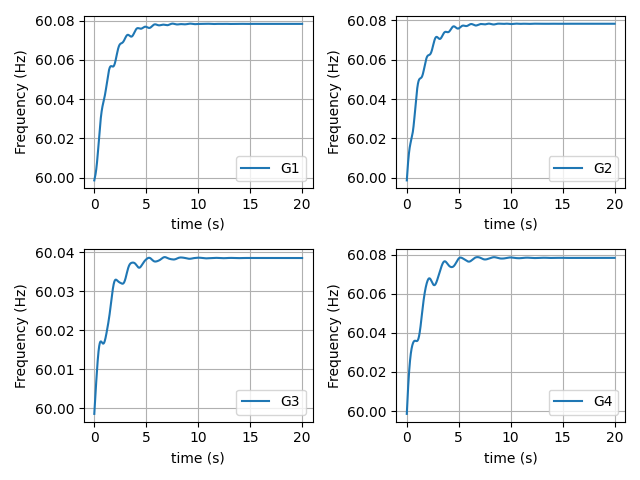

In [17]:
plt.figure()
plt.subplot(2,2,1)
for name in ['wr_gen1']:
#      plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  ts_ref_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx]*180/3.14, label='REF', color='black')
#     plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  ts_ref_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx]*180/3.14, label='REF', color='black', linestyle=':' )
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], ts_sp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx]*60/377, label='G1')
#     plt.plot(ts_dp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], ts_dp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx]*180/3.14, label='DP', linestyle='--')
plt.legend(loc='lower right')
# plt.axvline(x=10,  color='red', linewidth=2, linestyle=':')
# plt.axvline(x=10.2,  color='red', linewidth=2, linestyle=':')
# plt.xlim(8,15)
# plt.ylim(55,65)
plt.xlabel('time (s)')
plt.ylabel('Frequency (Hz)')
plt.grid()
plt.tight_layout()

plt.subplot(2,2,2)
for name in ['wr_gen2']:
#      plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  ts_ref_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx]*180/3.14, label='REF', color='black')
#     plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  ts_ref_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx]*180/3.14, label='REF', color='black', linestyle=':' )
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], ts_sp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx]*60/377, label='G2')
plt.legend()
#     plt.plot(ts_dp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], ts_dp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx]*180/3.14, label='DP', linestyle='--')

plt.legend(loc='lower right')
# plt.axvline(x=10,  color='red', linewidth=2, linestyle=':')
# plt.axvline(x=10.2,  color='red', linewidth=2, linestyle=':')
# plt.xlim(8,15)
# plt.ylim(55,65)
plt.xlabel('time (s)')
plt.ylabel('Frequency (Hz)')

plt.grid()
plt.tight_layout()

plt.subplot(2,2,3)
for name in ['wr_gen3']:
#      plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  ts_ref_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx]*180/3.14, label='REF', color='black')
#     plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  ts_ref_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx]*180/3.14, label='REF', color='black', linestyle=':' )
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], ts_sp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx]*60/377, label='G3')
plt.legend()
#     plt.plot(ts_dp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], ts_dp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx]*180/3.14, label='DP', linestyle='--')

plt.legend(loc='lower right')
# plt.axvline(x=10,  color='red', linewidth=2, linestyle=':')
# plt.axvline(x=10.2,  color='red', linewidth=2, linestyle=':')
# plt.xlim(8,15)
# plt.ylim(55,65)
plt.xlabel('time (s)')
plt.ylabel('Frequency (Hz)')

plt.grid()
plt.tight_layout()

plt.subplot(2,2,4)
for name in ['wr_gen4']:
#      plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  ts_ref_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx]*180/3.14, label='REF', color='black')
#     plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  ts_ref_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx]*180/3.14, label='REF', color='black', linestyle=':' )
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], ts_sp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx]*60/377, label='G4')
plt.legend()
#     plt.plot(ts_dp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], ts_dp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx]*180/3.14, label='DP', linestyle='--')

plt.legend(loc='lower right')
# plt.axvline(x=10,  color='red', linewidth=2, linestyle=':')
# plt.axvline(x=10.2,  color='red', linewidth=2, linestyle=':')
# plt.xlim(8,15)
# plt.ylim(55,65)
plt.xlabel('time (s)')
plt.ylabel('Frequency (Hz)')

plt.grid()
plt.tight_layout()

## Rotor angle $\delta _r$

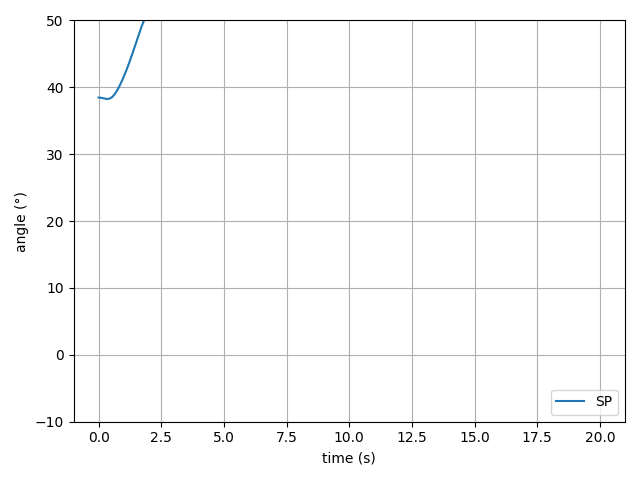

In [12]:
plt.figure()
# plt.title('SMIB Rotor angle')
plt.xlabel('time (s)')
plt.ylabel('angle (°)')

for name in ['delta_gen1']:
#      plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  ts_ref_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx]*180/3.14, label='REF', color='black')
#     plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  ts_ref_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx]*180/3.14, label='REF', color='black', linestyle=':' )
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], ts_sp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx]*180/3.14, label='SP')
#     plt.plot(ts_dp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], ts_dp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx]*180/3.14, label='DP', linestyle='--')

plt.legend(loc='lower right')
# plt.axvline(x=10,  color='red', linewidth=2, linestyle=':')
# plt.axvline(x=10.2,  color='red', linewidth=2, linestyle=':')
# plt.xlim(8,15)
plt.ylim(-10,50)

plt.grid()
plt.tight_layout()

# plt.savefig("./plotting/Output/" + str(date.today()) + '_Implementation_SMIB_angle' + '.pdf')
